# Análise Exploratória utilizando dados do Google Trends

*Este é um conjunto de dados com curadoria do Google Trends ao longo dos anos.
Todos os anos, o Google lança as consultas de pesquisa de tendências em todo o mundo em várias categorias, neste dataset, temos tendências de 2001 a 2020.*

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Google trends - trends.csv')

In [5]:
df.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [6]:
df.shape

(26955, 5)

In [23]:
df.dtypes

location    object
year         int64
category    object
rank         int64
query       object
dtype: object

In [22]:
df['location'] = df['location'].astype(str)

In [17]:
for column in df.columns:
  if df[column].dtype == object:
    df[column] = df[column].astype(str)

In [18]:
df.dtypes

location    object
year         int64
category    object
rank         int64
query       object
dtype: object

In [ ]:
df.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


## Quantos anos únicos nós temos no dataset? Qual a distribuição dessa variável?

*Contagem de valores unicos da coluna "ano"*

In [44]:
df['year'].nunique()

20

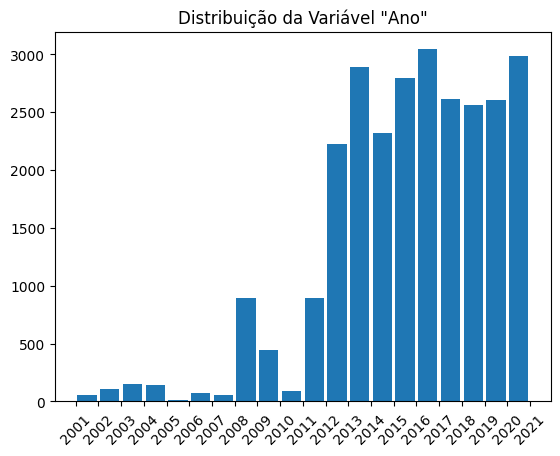

In [72]:
plt.hist(df['year'], bins=range(2001, 2022), rwidth=0.85)
plt.xticks(range(2001, 2022), rotation=45)
plt.title('Distribuição da Variável "Ano"')
plt.show()

## Quais os países que  aparecem no dataset? Quantos são?

*Nome de todos os Países Unicos que aparecem + países agrupados como "Global"*

In [ ]:
df['location'].unique()

*Contagem de todos os Países Unicos que aparecem + "Global"*

In [ ]:
df['location'].nunique()

## Quantas Querys diferentes aparecem no DataFrame? Qual a maior posição possível que uma pesquisa pode aparecer no rank (isto é, a mínima colocação)?

*Contagem total de todas as querys únicas presentes no arquivo*

In [45]:
df['query'].nunique()

18430

*Contagem total de todas os possíveis posicionamentos de cada query presente no arquivo*

In [46]:
df['rank'].nunique()

5

## Quantas Querys diferentes há em cada um dos anos do DataFrame? Quais os anos com a maior quantidade de querys?

*Valores da coluna "Ano" agrupados juntamente com a contagem de valores únicos da coluna "query" ordenados de forma decrescente*

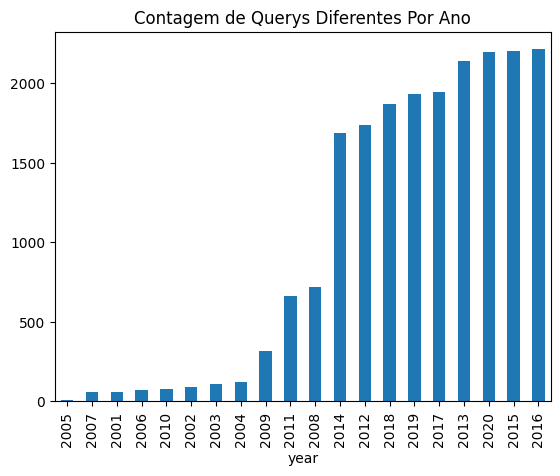

In [74]:
df.groupby('year')['query'].nunique().sort_values(ascending=True).plot(kind="bar")
plt.title('Contagem de Querys Diferentes Por Ano')
plt.show()

## Quais são os 10 países com a maior quantidade de querys presentes no DataFrame? Quantas Querys exatamente cada um desses países tem?

*Valores da coluna "Location" agrupados juntamente com os 10 valores com a maior contagem de valores únicos da coluna "query", ordenados de forma decrescente*

Text(0.5, 1.0, '10 Países com maior qtd de querys')

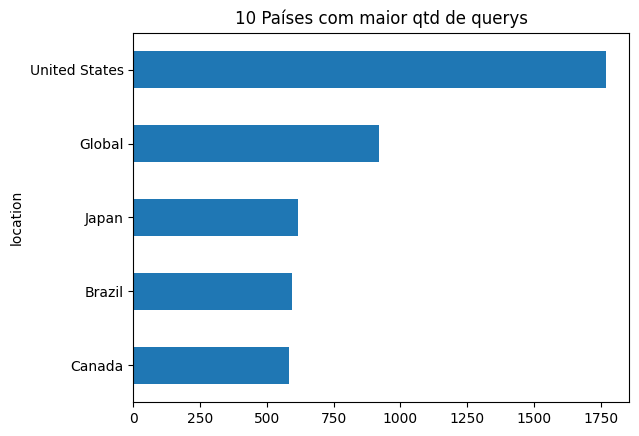

In [75]:
df.groupby('location')['query'].nunique().sort_values(ascending=True).tail(5).plot(kind='barh')
plt.title('10 Países com maior qtd de querys')

## Quantas Localizações diferentes aparecem nos 5 anos com maior frequência?

*5 valores com maior frequencia da coluna "Ano"*

In [61]:
df['year'].value_counts().sort_values(ascending=False).head(5)

2016    3040
2020    2980
2013    2890
2015    2790
2017    2610
Name: year, dtype: int64

*Gerar tabela apenas com dados de 2016, depois agrupar pela coluna "Ano" juntamente com a frequencia de ocorrências unicas da coluna "location"*

In [62]:
df_2016 = df[df.year == 2016]
df_2016.groupby('year')['location'].nunique()

year
2016    64
Name: location, dtype: int64

*Gerar tabela apenas com dados de 2020, depois agrupar pela coluna "Ano" juntamente com a frequencia de ocorrências unicas da coluna "location"*

In [ ]:
df_2020 = df[df.year == 2020]
df_2020.groupby('year')['location'].nunique()

year
2020    70
Name: location, dtype: int64

*Gerar tabela apenas com dados de 2013, depois agrupar pela coluna "Ano" juntamente com a frequencia de ocorrências unicas da coluna "location"*

In [ ]:
df_2013 = df[df.year == 2013]
df_2013.groupby('year')['location'].nunique()

year
2013    70
Name: location, dtype: int64

*Gerar tabela apenas com dados de 2015, depois agrupar pela coluna "Ano" juntamente com a frequencia de ocorrências unicas da coluna "location"*

In [ ]:
df_2015 = df[df.year == 2015]
df_2015.groupby('year')['location'].nunique()

year
2015    62
Name: location, dtype: int64

*Gerar tabela apenas com dados de 2017, depois agrupar pela coluna "Ano" juntamente com a frequencia de ocorrências unicas da coluna "location"*

In [ ]:
df_2017 = df[df.year == 2017]
df_2017.groupby('year')['location'].nunique()

year
2017    70
Name: location, dtype: int64

Juntar tabelas filtradas anteriormente em um único dataframe, agrupar pela coluna "Ano" e mostrar em um gráfico de barras a quantidade de valores únicos da coluna "location" para cada ano

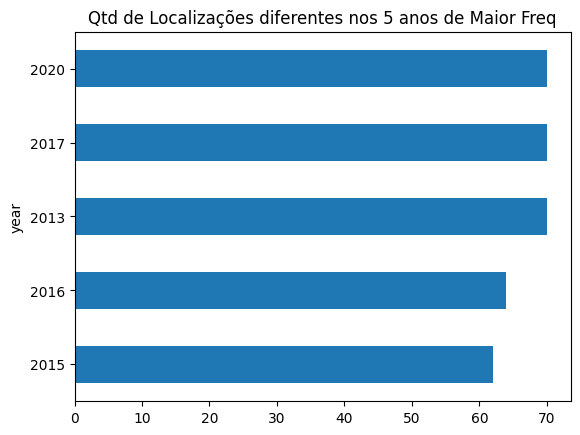

In [76]:
df_2016 = df[df.year == 2016]
df_2020 = df[df.year == 2020]
df_2013 = df[df.year == 2013]
df_2015 = df[df.year == 2015]
df_2017 = df[df.year == 2017]

df_merged = pd.concat([df_2016, df_2020, df_2013, df_2015, df_2017])
df_merged.groupby('year')['location'].nunique().sort_values(ascending=True).plot(kind='barh')

plt.title('Qtd de Localizações diferentes nos 5 anos de Maior Freq')
plt.show()